# Data cleanup

In [ ]:
import pandas as pd

player_count_check = pd.read_csv('G:/datasets/csgo/match-map-unique/train/match-58-de_inferno-17-687.csv')
player_count = player_count_check['SteamId'].nunique()

In [ ]:
player_count

In [1]:
from csgo_wp.data_transform import CSGODataset, transform_data

In [2]:
import warnings
warnings.filterwarnings('ignore')

dataset = CSGODataset(transform=transform_data)

Transforming raw data...


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
with open('G:/datasets/csgo/train/data.pckl', 'wb') as f:
    pickle.dump((dataset.data, dataset.targets), f)

In [12]:
import pandas as pd
df = pd.read_csv('G:/datasets/csgo/match-map-unique/train/match-1071-de_dust2-1-278.csv')

In [16]:
df.groupby(['MatchId']).agg({'PlayerSteamId': 'nunique'})

,PlayerSteamId
MatchId,
1071,10


In [22]:
df.groupby(['Tick']).agg({'PlayerSteamId': 'nunique'})

,PlayerSteamId
Tick,
28,9
61,9
94,9
127,9
160,9
...,...
9039,9
9072,9
9105,9


In [20]:
grouped = df.groupby(['Tick', 'Side'], as_index=False).agg({'PlayerSteamId': 'nunique'})
grouped[grouped['Side'] == 'T']['PlayerSteamId'].unique()

array([4], dtype=int64)

In [26]:
for x in df[df['Side'] == 'T']['PlayerSteamId'].unique():
    print(f'https://steamcommunity.com/profiles/{x}/')
    print(f"Showed up in {df[df['PlayerSteamId'] == x]['Tick'].nunique()} ticks")

https://steamcommunity.com/profiles/76561198047402862/
Showed up in 140 ticks
https://steamcommunity.com/profiles/76561197997981170/
Showed up in 278 ticks
https://steamcommunity.com/profiles/76561197994395491/
Showed up in 278 ticks
https://steamcommunity.com/profiles/76561197978321481/
Showed up in 278 ticks
https://steamcommunity.com/profiles/76561198012987839/
Showed up in 138 ticks


In [27]:
df.shape[0]

2502

In [28]:
278*9

2502

In [3]:
dataset[0]

g:\git\csgo-win-probability\csgo_wp\data_transform.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos'] = df[['X', 'Y', 'Z']].values.tolist()


(tensor([[ 1., 50., 51.,  2., 43.,  1.,  8.,  3., 38., 46.],
         [36.,  1.,  2., 35.,  8., 36., 39., 36.,  8.,  2.],
         [37.,  2.,  1., 36.,  9., 37., 40., 37.,  9.,  3.],
         [ 2., 49., 50.,  1., 42.,  2.,  7.,  2., 37., 45.],
         [30.,  8.,  9., 29.,  1., 30., 32., 30.,  4.,  4.],
         [ 1., 50., 51.,  2., 43.,  1.,  8.,  3., 38., 46.],
         [24., 53., 54., 23., 46., 24.,  1., 22., 41., 49.],
         [ 3., 50., 51.,  2., 43.,  3.,  8.,  1., 38., 46.],
         [29.,  8.,  9., 28.,  4., 29., 31., 29.,  1.,  5.],
         [32.,  2.,  3., 31.,  4., 32., 35., 32.,  5.,  1.],
         [ 1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.],
         [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.]]), tensor([1.]))

In [5]:
import torch
import time
import warnings
warnings.filterwarnings('ignore')

loader = torch.utils.data.DataLoader(dataset,
                                         batch_size=24,
                                         shuffle=False,
                                         num_workers=0,
                                         )
start = time.time()
# check if dataset acts as expected
for index, (data, target) in enumerate(loader):
    print(index, data.shape, target.shape)
print(time.time() - start)

0 torch.Size([24, 12, 10]) torch.Size([24, 1])
1 torch.Size([24, 12, 10]) torch.Size([24, 1])
2 torch.Size([24, 12, 10]) torch.Size([24, 1])
3 torch.Size([24, 12, 10]) torch.Size([24, 1])
4 torch.Size([24, 12, 10]) torch.Size([24, 1])
5 torch.Size([24, 12, 10]) torch.Size([24, 1])
6 torch.Size([24, 12, 10]) torch.Size([24, 1])
7 torch.Size([24, 12, 10]) torch.Size([24, 1])
8 torch.Size([24, 12, 10]) torch.Size([24, 1])
9 torch.Size([24, 12, 10]) torch.Size([24, 1])
10 torch.Size([24, 12, 10]) torch.Size([24, 1])
11 torch.Size([24, 12, 10]) torch.Size([24, 1])
12 torch.Size([24, 12, 10]) torch.Size([24, 1])
13 torch.Size([24, 12, 10]) torch.Size([24, 1])
14 torch.Size([24, 12, 10]) torch.Size([24, 1])
15 torch.Size([24, 12, 10]) torch.Size([24, 1])
16 torch.Size([24, 12, 10]) torch.Size([24, 1])
17 torch.Size([24, 12, 10]) torch.Size([24, 1])
18 torch.Size([24, 12, 10]) torch.Size([24, 1])
19 torch.Size([24, 12, 10]) torch.Size([24, 1])
20 torch.Size([24, 12, 10]) torch.Size([24, 1])
21

KeyboardInterrupt: 

In [ ]:
# del dataset

In [14]:
import pandas as pd

player_count_check = pd.read_csv('G:/datasets/csgo/match-map-unique/train/match-96-de_dust2-11-147.csv')
player_count = player_count_check['PlayerSteamId'].nunique()
player_count

9

In [23]:
tick_count_check = pd.read_csv('G:/datasets/csgo/csgo_playerframes_dust2.csv',
                               names=['MatchId',
                              'MapName',
                              'RoundNum',
                              'Tick',
                              'Second',
                              'PlayerId',
                              'PlayerSteamId',
                              'TeamId',
                              'Side',
                              'X',
                              'Y',
                              'Z',
                              'ViewX',
                              'ViewY',
                              'AreaId',
                              'Hp',
                              'Armor',
                              'IsAlive',
                              'IsFlashed',
                              'IsAirborne',
                              'IsDucking',
                              'IsScoped',
                              'IsWalking',
                              'EqValue',
                              'HasHelmet',
                              'HasDefuse',
                              'DistToBombsiteA',
                              'DistToBombsiteB',
                              'Created',
                              'Updated'],
                               usecols=['MatchId', 'MapName', 'RoundNum', 'Tick', 'PlayerSteamId'])

In [24]:
tick_count_check[(tick_count_check['MatchId'] == 96)].groupby('MatchId').agg({'PlayerSteamId': 'nunique'})

,PlayerSteamId
MatchId,
96,10


# Baseline

In [24]:
# ideas: map-based, player count based, logreg, peterx's stuff
import pandas as pd

map_data = pd.read_csv('G:/datasets/csgo/csgo_rounds_dust2.csv', usecols=['RoundNum', 'WinningSide'])
map_baseline = map_data.groupby('WinningSide').agg({'RoundNum': 'count'})
map_baseline = map_baseline / map_baseline.sum(axis=0)
map_baseline

,RoundNum
WinningSide,
CT,0.474391
T,0.525609


In [27]:
import numpy as np

print(roc_auc_score(map_data['WinningSide'] == 'CT', np.zeros(map_data.shape[0])))
del map_data

0.5


In [28]:
# player count based
import pandas as pd

player_data = pd.read_csv('G:/datasets/csgo/csgo_playerframes_dust2.csv',
                          names=['MatchId',
                              'MapName',
                              'RoundNum',
                              'Tick',
                              'Second',
                              'PlayerId',
                              'PlayerSteamId',
                              'TeamId',
                              'Side',
                              'X',
                              'Y',
                              'Z',
                              'ViewX',
                              'ViewY',
                              'AreaId',
                              'Hp',
                              'Armor',
                              'IsAlive',
                              'IsFlashed',
                              'IsAirborne',
                              'IsDucking',
                              'IsScoped',
                              'IsWalking',
                              'EqValue',
                              'HasHelmet',
                              'HasDefuse',
                              'DistToBombsiteA',
                              'DistToBombsiteB',
                              'Created',
                              'Updated'],
                          usecols=['MatchId', 'RoundNum', 'Tick', 'Side', 'IsAlive'])
player_data['IsAlive'] = player_data['IsAlive'].astype(int)
results = pd.read_csv('G:/datasets/csgo/csgo_rounds_dust2.csv', usecols=['MatchId', 'RoundNum', 'WinningSide'])
player_data = pd.merge(player_data, results, on=['MatchId', 'RoundNum'])
del results
player_data['WinningSide'] = (player_data['WinningSide'] == 'CT').astype(int)
player_data = player_data.groupby(['MatchId',
                                       'RoundNum',
                                       'Side',
                                       'Tick',
                                      ],
                                      as_index=False).agg({'IsAlive': 'sum', 'WinningSide': 'max'})
player_data

,MatchId,RoundNum,Side,Tick,IsAlive,WinningSide
0,4,1,CT,15257,5,1
1,4,1,CT,15290,5,1
2,4,1,CT,15323,5,1
3,4,1,CT,15356,5,1
4,4,1,CT,15389,5,1
...,...,...,...,...,...,...
2131902,1892,22,T,306530,1,1
2131903,1892,22,T,306596,1,1
2131904,1892,22,T,306662,1,1
2131905,1892,22,T,306728,1,1


In [29]:
pivoted = player_data.pivot_table(index=['MatchId', 'RoundNum', 'Tick'], values=['IsAlive'], columns=['Side'])
pivoted['Winner'] = player_data.groupby(['MatchId', 'RoundNum', 'Tick']).agg({'WinningSide': 'max'})['WinningSide']
pivoted

IsAlive      Winner
Side                         CT    T       
MatchId RoundNum Tick                      
4       1        15257      5.0  5.0      1
                 15290      5.0  5.0      1
                 15323      5.0  5.0      1
                 15356      5.0  5.0      1
                 15389      5.0  5.0      1
...                         ...  ...    ...
1892    22       306530     3.0  1.0      1
                 306596     3.0  1.0      1
                 306662     3.0  1.0      1
                 306728     3.0  1.0      1
                 306794     3.0  1.0      1

[1069034 rows x 3 columns]

In [30]:
pivoted.index.levels[0]

Int64Index([   4,   15,   21,   26,   28,   29,   37,   38,   41,   47,
            ...
            1676, 1677, 1690, 1693, 1698, 1786, 1799, 1853, 1878, 1892],
           dtype='int64', name='MatchId', length=173)

In [31]:
import numpy as np

mask = np.random.choice(pivoted.index.levels[0], replace=False, size=int(pivoted.index.levels[0].shape[0] * 0.8))
pivoted.reset_index(drop=False, inplace=True)
train, test = pivoted[pivoted['MatchId'].isin(mask)], pivoted[~pivoted['MatchId'].isin(mask)]
print(pivoted.shape[0], train.shape[0], test.shape[0])

1069034 850701 218333


In [32]:
import seaborn as sns

player_baseline = train.groupby([('IsAlive', 'CT'), ('IsAlive', 'T')], as_index=False).agg({('Winner', ''): 'mean'})
player_baseline.columns = ['CT count', 'T count', 'Win probability']
player_baseline_pivoted = player_baseline.pivot('CT count', 'T count', 'Win probability')

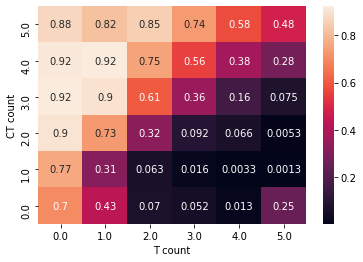

In [33]:
sns.heatmap(data=player_baseline_pivoted[::-1], annot=True);

In [34]:
player_baseline

,CT count,T count,Win probability
0,0.0,0.0,0.701897
1,0.0,1.0,0.431849
2,0.0,2.0,0.069738
3,0.0,3.0,0.051923
4,0.0,4.0,0.013245
5,0.0,5.0,0.246753
6,1.0,0.0,0.767359
7,1.0,1.0,0.314527
8,1.0,2.0,0.063484
9,1.0,3.0,0.016426


In [35]:
test = test[[('IsAlive', 'CT'), ('IsAlive', 'T'), ('Winner', '')]]
test.columns = ['CT count', 'T count', 'truth']

preds = pd.merge(test, player_baseline, on=['CT count', 'T count'])
preds

,CT count,T count,truth,Win probability
0,5.0,5.0,1,0.480956
1,5.0,5.0,1,0.480956
2,5.0,5.0,1,0.480956
3,5.0,5.0,1,0.480956
4,5.0,5.0,1,0.480956
...,...,...,...,...
217921,0.0,5.0,1,0.246753
217922,0.0,5.0,1,0.246753
217923,0.0,5.0,1,0.246753
217924,0.0,5.0,1,0.246753


In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(preds['truth'], preds['Win probability'])

0.7837721634898503

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(preds['truth'], preds['Win probability'] > 0.5)

0.6922854546956306

In [65]:
# WOAH. what is that??? that can't be right

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(preds['truth'], preds['Win probability'])

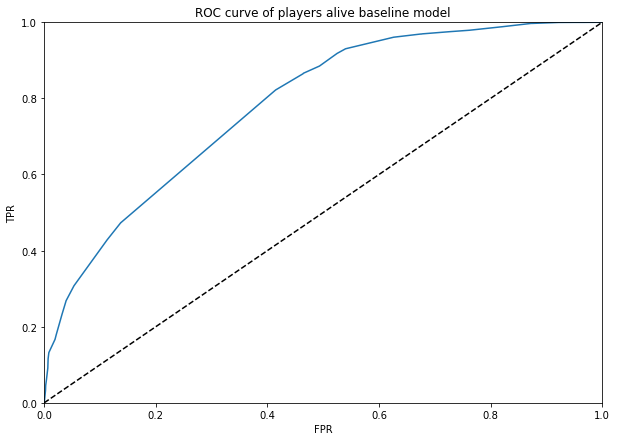

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of players alive baseline model');

In [70]:
# examine what is up with the weird numbers for 0 ct's

train.columns = ['MatchId', 'RoundNum', 'Tick', 'CT count', 'T count', 'Winner']
train.head()

,MatchId,RoundNum,Tick,CT count,T count,Winner
0,4,1,15257,5.0,5.0,1
1,4,1,15290,5.0,5.0,1
2,4,1,15323,5.0,5.0,1
3,4,1,15356,5.0,5.0,1
4,4,1,15389,5.0,5.0,1


In [71]:
train[(train['CT count'] == 0) & (train['T count'] == 5)]

,MatchId,RoundNum,Tick,CT count,T count,Winner
49746,47,19,300835,0.0,5.0,0
49748,47,19,300901,0.0,5.0,0
49749,47,19,300934,0.0,5.0,0
49750,47,19,300967,0.0,5.0,0
49752,47,19,301033,0.0,5.0,0
165488,235,1,11407,0.0,5.0,1
165489,235,1,11473,0.0,5.0,1
165490,235,1,11539,0.0,5.0,1
165491,235,1,11605,0.0,5.0,1
165492,235,1,11671,0.0,5.0,1


In [1]:
from csgo_wp.data_transform import transform_data, CSGODataset
import warnings
warnings.filterwarnings('ignore')

dataset = CSGODataset(transform=transform_data)

Transforming raw data...
Transforming 1495/1495: 1649, de_dust2, 22
Done!


In [2]:
print(dataset.data.shape)

torch.Size([413319, 12, 10])


In [3]:
val_dataset = CSGODataset(transform=transform_data, dataset_split='val')
test_dataset = CSGODataset(transform=transform_data, dataset_split='test')

Transforming raw data...
Transforming 642/642: 1786, de_dust2, 27
Done!
Transforming raw data...
Transforming 603/603: 1799, de_dust2, 30
Done!


In [4]:
print(val_dataset.data.shape)
print(test_dataset.data.shape)

torch.Size([176370, 12, 10])
torch.Size([164819, 12, 10])


0.5100189291896169


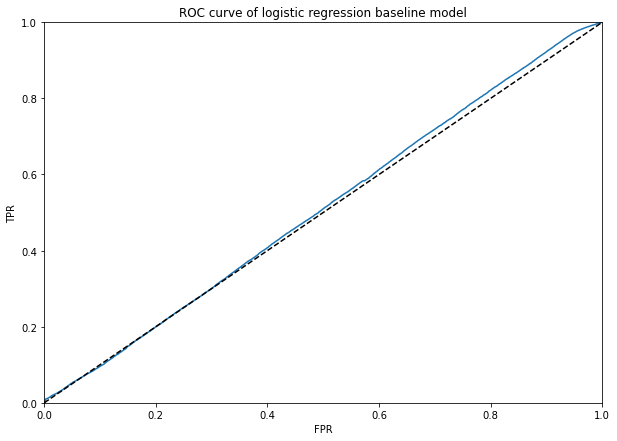

In [5]:
import torch

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13)
lr.fit(dataset.data.view(-1, 120), dataset.targets)
preds = lr.predict_proba(val_dataset.data.view(-1, 120))

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(val_dataset.targets, preds[:, 0])

print(roc_auc_score(val_dataset.targets, preds[:, 0]))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of logistic regression baseline model');

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 76.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 88.2min finished


0.5017980159110792


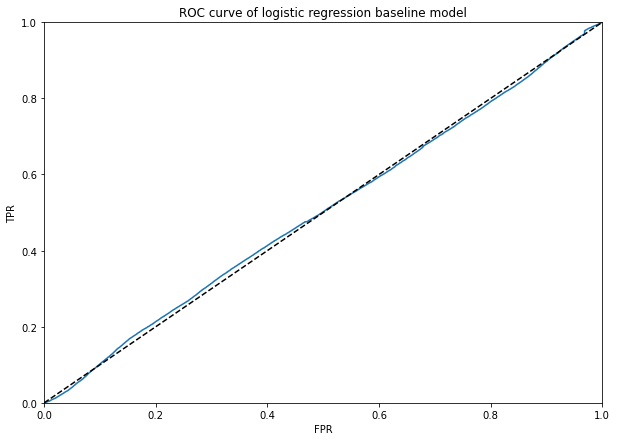

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

params = {'C': loguniform(1e-3, 1e1),
          'l1_ratio': uniform(),
          }

lr = LogisticRegression(random_state=13, solver='saga', penalty='elasticnet')

cv = RandomizedSearchCV(lr, params, random_state=3, n_iter=100, n_jobs=-1, verbose=1, scoring='roc_auc')
cv.fit(dataset.data.view(-1, 120), dataset.targets)

preds = cv.best_estimator_.predict_proba(val_dataset.data.view(-1, 120))

fpr, tpr, _ = roc_curve(val_dataset.targets, preds[:, 1])

print(roc_auc_score(val_dataset.targets, preds[:, 1]))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of logistic regression baseline model');

In [10]:
cv.best_estimator_

LogisticRegression(C=0.02305440604242659, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1,
                   l1_ratio=0.06467319799028326, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=13, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 25.1min finished


0.5018716279161413


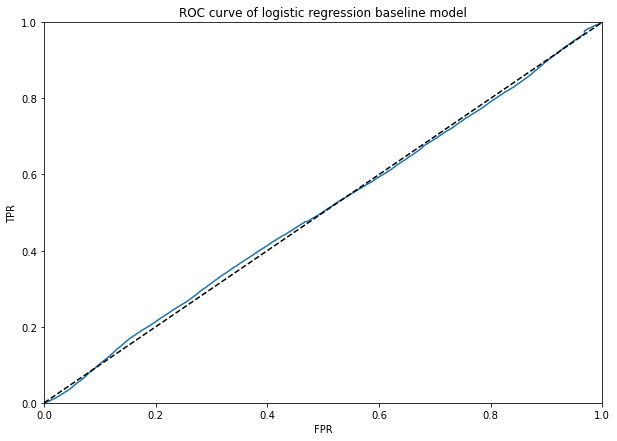

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

params = {'C': loguniform(1e-3, 1e1),
          'l1_ratio': uniform(),
          }

scaler = StandardScaler()
thresh = VarianceThreshold()  # remove constant features

thresh.fit(dataset.data.view(-1, 120))
scaler.fit(thresh.transform(dataset.data.view(-1, 120)))

lr = LogisticRegression(random_state=13, solver='saga', penalty='elasticnet')

cv = RandomizedSearchCV(lr, params, random_state=3, n_iter=100, n_jobs=-1, verbose=1, scoring='roc_auc', pre_dispatch='n_jobs')
cv.fit(scaler.transform(thresh.transform(dataset.data.view(-1, 120))),
       dataset.targets)

preds = cv.best_estimator_.predict_proba(scaler.transform(thresh.transform(val_dataset.data.view(-1, 120))))

fpr, tpr, _ = roc_curve(val_dataset.targets, preds[:, 1])

print(roc_auc_score(val_dataset.targets, preds[:, 1]))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve of logistic regression baseline model');

In [22]:
cv.best_estimator_.score(scaler.transform(thresh.transform(val_dataset.data.view(-1, 120))), val_dataset.targets)

0.5511878437375971

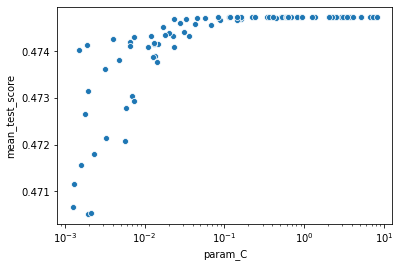

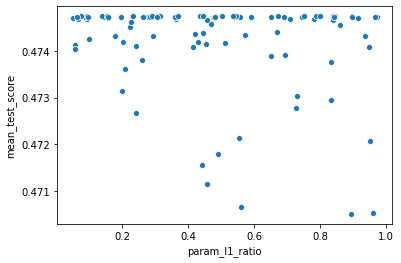

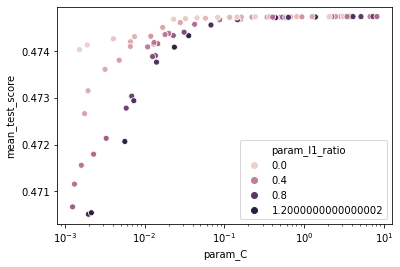

In [21]:
import pandas as pd
import seaborn as sns

results = pd.DataFrame.from_dict(cv.cv_results_)
sns.scatterplot(x='param_C', y='mean_test_score', data=results)
plt.xscale('log')
plt.show()
sns.scatterplot(x='param_l1_ratio', y='mean_test_score', data=results)
plt.show()
sns.scatterplot(x='param_C', y='mean_test_score', hue='param_l1_ratio', data=results)
plt.xscale('log')
plt.show()